4.8.1理想低通滤波器

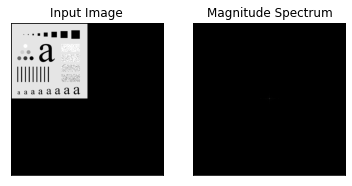

[[0.04742173 0.04559548 0.03695532 ... 0.02596887 0.03695532 0.04559548]
 [0.04838732 0.04070775 0.03086822 ... 0.03375579 0.04173402 0.05046956]
 [0.04734921 0.03488222 0.02109432 ... 0.04056961 0.04449466 0.05074092]
 ...
 [0.03959811 0.04290478 0.04069889 ... 0.00635969 0.00961185 0.02550853]
 [0.04734921 0.05074092 0.04449466 ... 0.01233334 0.02109432 0.03488222]
 [0.04838732 0.05046956 0.04173402 ... 0.01965689 0.03086822 0.04070775]]


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread(r"images/Fig0441(a)(characters_test_pattern).tif")
image_gary = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#填充0
rows, cols = image_gary.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
image_full = np.zeros((2*rows, 2*cols))
image_full[:rows, :cols] = image_gary


dft = cv2.dft(image_full, flags=cv2.DFT_COMPLEX_OUTPUT)
#dft = np.fft.fft2(image_full)
dft_shift = np.fft.fftshift(dft)

# 计算幅值
magnitude_spectrum = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])
#magnitude_spectrum = np.log(np.abs(dft_shift))
cv2.normalize(magnitude_spectrum, magnitude_spectrum, 0, 255, cv2.NORM_MINMAX)

plt.subplot(121),plt.imshow(image_full, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, "gray")
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
print(magnitude_spectrum)